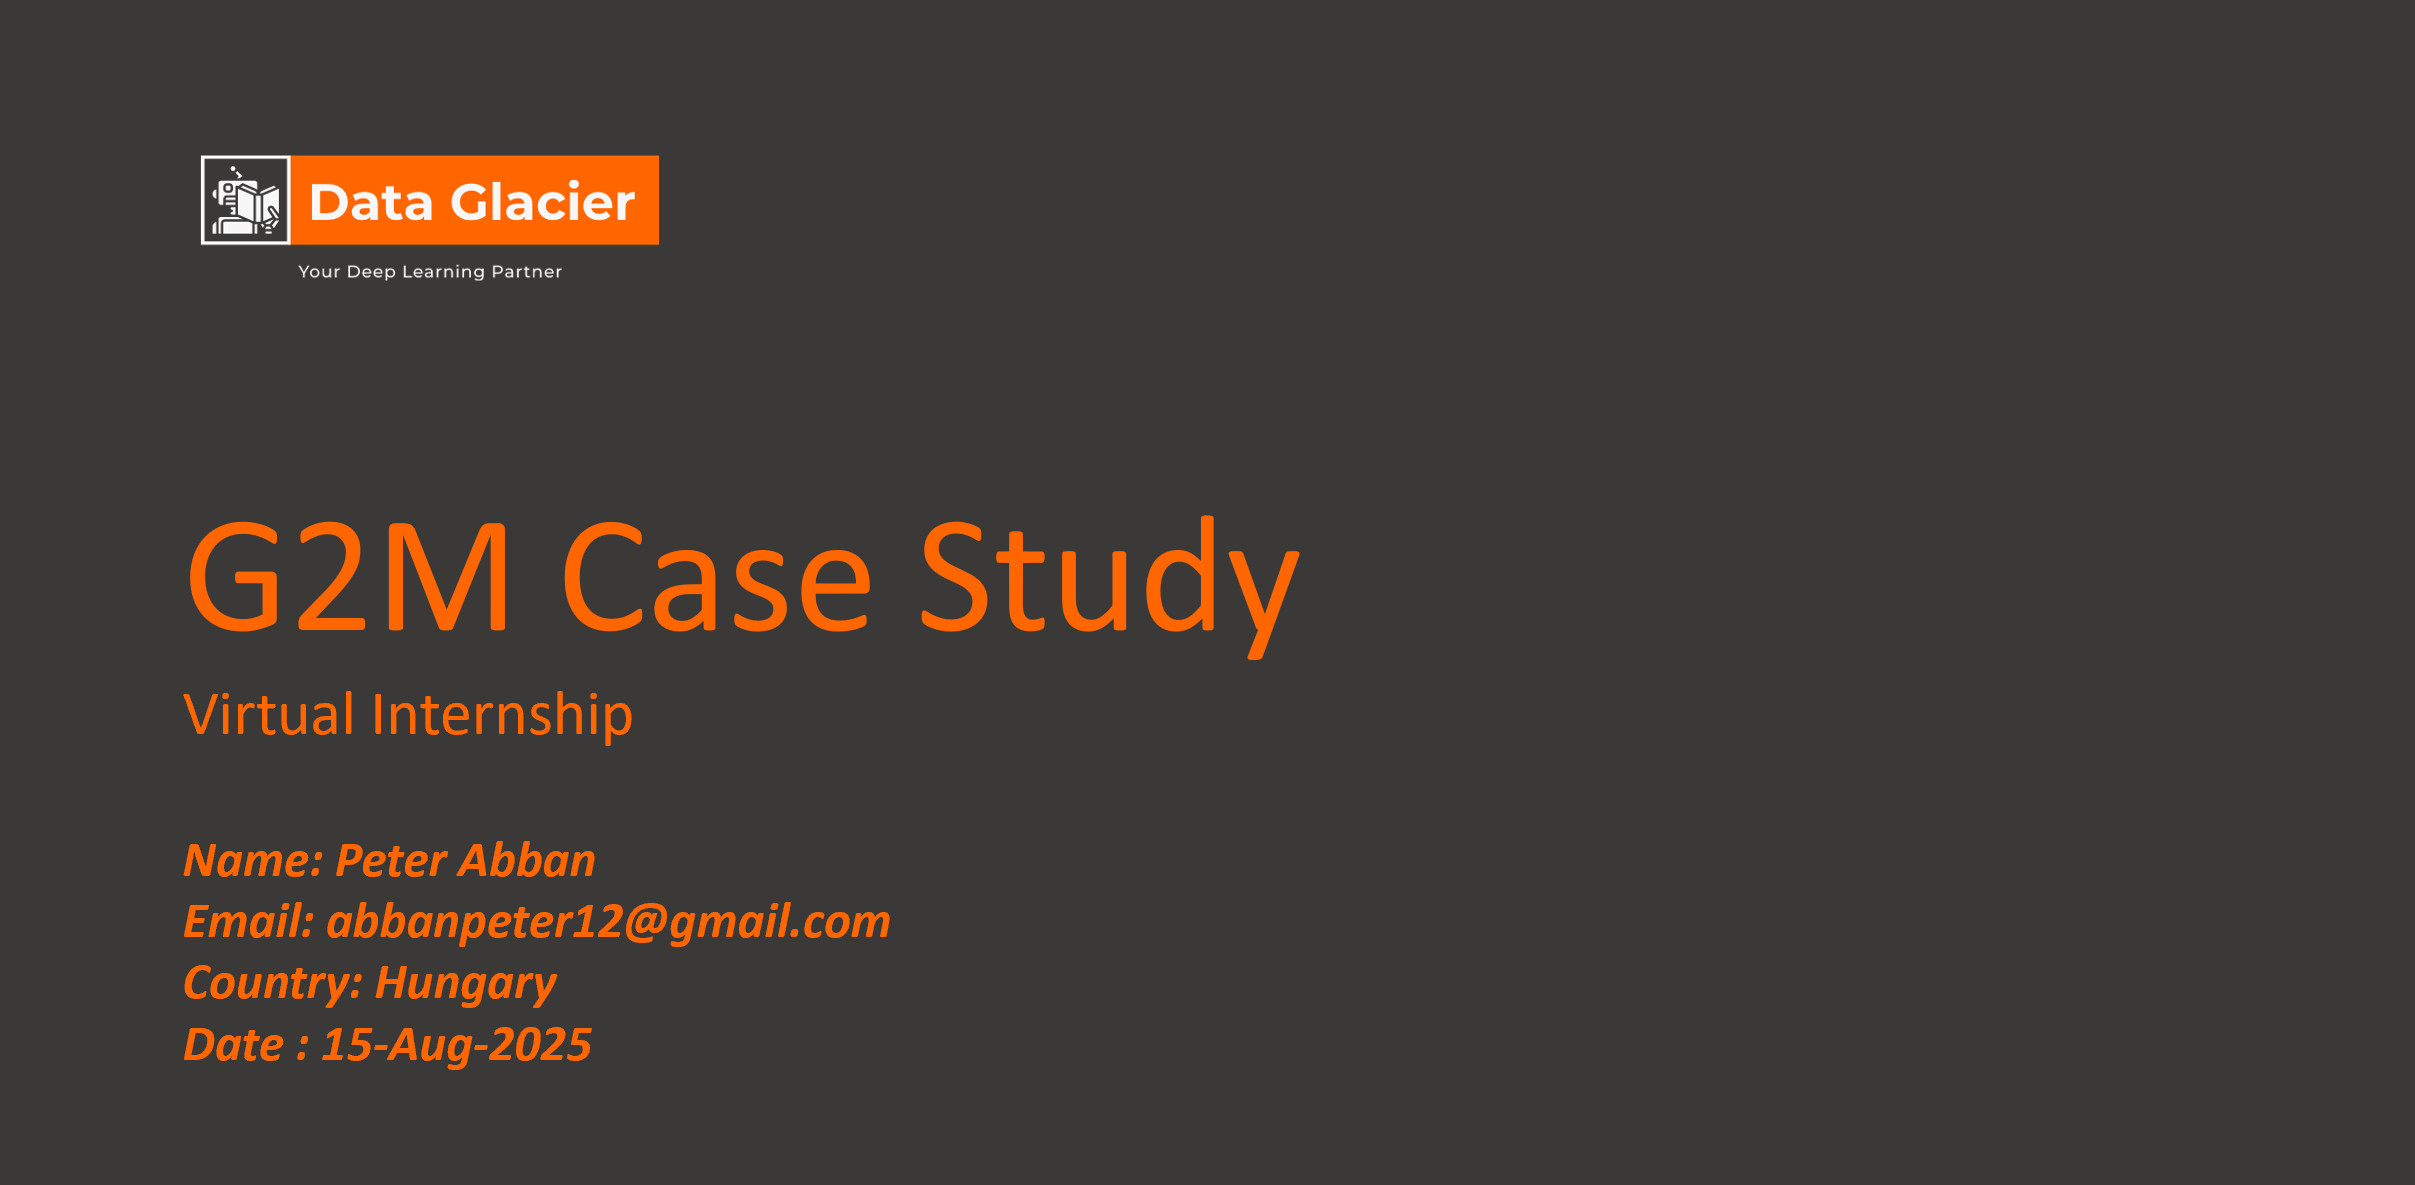

# **Project: GSM Insight for Cab Investment Firm**

## I. **Project Details:**

 **XYZ is a private firm in the U.S and due to remarkable growth in the Cab industry in the last few years and multiple key players 
 in the market, it is planning for an investment in the cab industry, and as per their Go-to-Market(G2M) strategy they want to understand 
the market before taking the final decision.**

## II. **Dataset Description** 

**We have multiple dataset that contains information on two Cab campanies. Each file present different aspects of the customer profile.
Company XYZ is interested in using the analysis and the insights we provide on the datasets to make informed decisions on which Cab industry to invest in.**

## III. **Datasets:**

**1. _Cab_Data.csv_ - This file contains the details of the transaction for the 2 Cab Companies.**  

**2. _Customer_ID.csv_ - This is mapping table that contains unique identifier which links the customer's demographic details.**  

**3. _Transaction_ID.csv_ - This is mapping table that contains transcation to customer mapping and payment mode.**  

**4. _City.csv_ - U.S cities, thier population  and the number of Cab users.**
[Data source](https://github.com/DataGlacier/DataSets.git)

## 1. **Importing the Dependencies:**

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)
print("All libraries sucessfully loaded")

All libraries sucessfully loaded


## 2. **Loading all datasets:**

In [244]:
# 1. Cab_data:
Cab_data = pd.read_csv("Cab_Data.csv")

In [245]:
# 2. Customer_ID
Customer_id = pd.read_csv("Customer_ID.csv")

In [246]:
# 3. Transaction_ID:
Transaction_id = pd.read_csv("Transaction_ID.csv")

In [247]:
# 4. City
City = pd.read_csv("City.csv")

## 3. Feature Enginering Process: **_Understanding Dataset_**
 * Head or First 5 rows of data
 * Size of dataset: shape
 * Data columns
 * Data types and the number of these categorical: Nominal and Ordinal data types:
 * Information about dataset
 * Statistical description of dataset
 * Checking for NaN or missing values and sort in ascending order for clarity

In [248]:
Cab_data.head(5) # First 5 rows of Cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [249]:
Customer_id.head(5) # First 5 rows of the customer_id

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [250]:
Transaction_id.head(5) # First 5 rows of the Transaction_id

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [251]:
City.head(5) # First 5 rows of the City

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


### i. Size of dataset: shape

In [252]:
Cab_data.shape # Cab_dataset

(359392, 7)

 #### **_Observation_**:  Cab dataset contains **359392 rows** and **7 feature columns**

In [253]:
Customer_id.shape # Customer_id

(49171, 4)

#### **_Observation_**:  Customer_id contains: **49171 rows** and **4 feature columns**

In [254]:
Transaction_id.shape # Transaction_id

(440098, 3)

#### **_Observation_**: The transaction_id contains **440098 rows** and **3 feature columns**

In [255]:
City.shape # City 

(20, 3)

#### **_Observation_**: The various U.S cities contains **20 rows** and **3 feature columns**

### iii. Data columns

In [256]:
Cab_data.columns # Data columns of Cab_data has 7 columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [257]:
Customer_id.columns # Data columns of customer_id has 4 columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [258]:
Transaction_id.columns # Data columns of Transaction_id has 3 columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [259]:
City.columns # Data columns of city has 3 columns

Index(['City', 'Population', 'Users'], dtype='object')

#### **_Observation_**: All data columns are of the right labelling and format

### iv. Data types and the number of categorical: Nominal and Ordinal data types

In [260]:
Cab_data.dtypes  # Cab_data has 2 int, 2 object-string and 3 floating data types

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [261]:
Customer_id.dtypes # Customer_id has 3 int, and one object

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [262]:
Transaction_id.dtypes # Transaction_id has 2 int and 1 object-string

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [263]:
City.dtypes # City has all 3 columns as objects

City          object
Population    object
Users         object
dtype: object

### v. Information about datasets

In [264]:
Cab_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


#### Cab_dataset also contains a total of 7 columns with no missing values in rows

In [265]:
Customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


#### Customer_id has 4 columns with no missing values in rows

In [266]:
Transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


#### Transaction_id has 3 columns with no missing values in rows

In [267]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


#### City has 3 columns with no missing values in rows

### vi. Statistical Description of Dataset

In [268]:
Cab_data.describe().T # Statistical description of the Cab_dataset

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
Date of Travel,359392.0,4.296407e+04,307.467197,42371.0,4.269700e+04,42988.00,4.323200e+04,43465.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


## 4. Feature Enginering Process: **_First Data Cleaning Steps_**

* Identifying duplicates
*  Dropping off irrelevant columns or applying data imputation
*  Changing of misappropriated data types
*  Renaming data columns if necessary
*  Checking for missing valus or NaN values
*  Checking for Duplicates by individual column feature names
*  Column splitting if necessary for clarity
*  Feature creation
*  Replacement of regular expressions if any feature columns
*  Proper alignment or positioning of feature columns

#### i. Identifying Duplicates in General

In [269]:
Cab_data.duplicated(keep = 'first').value_counts() # No duplicates in Cab_data dataset

False    359392
Name: count, dtype: int64

In [270]:
Customer_id.duplicated(keep ='first').value_counts() # No duplicates in Customer_id dataset

False    49171
Name: count, dtype: int64

In [271]:
Transaction_id.duplicated(keep = 'first').value_counts() # No duplicates in Transaction_id dataset

False    440098
Name: count, dtype: int64

In [272]:
City.duplicated(keep = 'first').value_counts() # No duplicates in the City dataset 

False    20
Name: count, dtype: int64

#### All other Feature Engineering Process: **_First data cleaning steps_** remains standard and do not change for our working dataset

## 5. Feature Enginering Process: **_Data Transformations_**

### i. We create a single comprehensive dataframe containing all the information of the four datasets

In [273]:
# Cab_data merged with transaction_id on  Transaction ID
merged_data = pd.merge(Cab_data, Transaction_id, on = "Transaction ID", how = "inner")

In [274]:
merged_data.head() # First 5 rows of the dataset

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [275]:
# merged_data is merged with customer_id on Customer ID
merged_data = pd.merge(merged_data, Customer_id, on = "Customer ID", how ="inner")

In [276]:
merged_data.head() # First 5 rows of the dataset

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [277]:
# merged_data is merged with city dataset on City
merged_data = pd.merge(merged_data, City, on ="City", how = "inner")

In [278]:
merged_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


In [279]:
display(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 38.4+ MB


None

In [304]:
merged_data.to_csv("Final_dataset.csv", index = False)

#### **Observation**: The final information about the dataset shows all the columns, datatypes and non-null columns counts - all columns have no missing values

### ii. Analysis on Cab Performance

#### We compare the performance of each Cab based on their **total revenue**, **number of travels** and **profit for each travel**

In [280]:
merged_data["Profit"] = merged_data["Price Charged"] - merged_data["Cost of Trip"] # Profit of each travel
Company_Performance = merged_data.groupby('Company').agg(Total_Profit = ('Profit', 'sum'),
                                                         Number_of_Travels = ('Transaction ID', 'sum'),
                                                         Total_Revenue = ('Price Charged', 'sum'))
display(Company_Performance)

,Total_Profit,Number_of_Travels,Total_Revenue
Company,,,
Pink Cab,5.307328e+06,866080030579,2.632825e+07
Yellow Cab,4.402037e+07,2807179773351,1.258539e+08


####  **Observation**: Yellow Cab makes **_more revenue_**, has **_higher profit_** in return and has the **_highest number of travels_** than Pink Cab

### iii. Analysis on Customer Demographics

#### We analyse the distribution of the age and gender of customer data, grouped by company to observe for demographic differences 
#### of customer bases for the two companies

In [281]:
# Analysis on Age distribution
display(merged_data.groupby("Company")["Age"].describe())

# Analysis on Gender distribution
display(merged_data.groupby("Company")["Gender"].value_counts(normalize = True).unstack())

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Pink Cab,84711.0,35.322414,12.644780,18.0,25.0,33.0,42.0,65.0
Yellow Cab,274681.0,35.341112,12.578625,18.0,25.0,33.0,42.0,65.0


Gender,Female,Male
Company,,
Pink Cab,0.442445,0.557555
Yellow Cab,0.422308,0.577692


#### **Observation**: 
#### 1. In terms of _age distribution_, both companies have the **same distribution** independent of the demographic settings, however there is a higher count for **Yellow Cab Company**
#### 2. In terms of _Gender distribution_, Pink Cab has more _Female travelers_ than _Male travelers_ while Yello Cab has more _Male travelers_ than _females_.
#### Deductions: **The higher counts for Yellow Cab is due to more Male Travelers in their company**

### iv. Analysis on Transaction Patterns

#### We analyse the transaction data to **indentify trends**: _frequency of travel_, _average travel cost_ and _payment methods_

##### Analysis of transaction: Frequency of travel and average travel cost
display(merged_data.groupby('Company').agg(Total_Transactions = ("Transaction ID", 'count'),
                                           Average_Price = ("Price Charged", 'mean')))

# Analysis of payment methods by company:
display(merged_data.groupby("Company")["Payment_Mode"].value_counts(normalize = True).unstack())

#### **Observation**: 
#### 1. _Yellow Cab_ tends to have **higher transaction rate - higher frequency of travel and averge travel cost** than _Pink Cab_  
#### 2. Yellow Cab accepts more _Card_ as their payment option than _Cash_ compared to Pink Cab Company

### v. Analysis of the City-Wise Data

#### We analyse the City dataset including the population and the presence of each Cab Company to understand the Market trend

In [283]:
# Anaysis on City-wise performance:
City_Performance = merged_data.groupby(["City", "Company"]).agg(Total_Profit = ("Profit", "sum"),
                                                                Number_of_Travels = ("Transaction ID", "count"),
                                                                Total_Revenue = ("Price Charged", "sum")).reset_index()

In [284]:
# Analysis on the City-wise User Distribution:
City_User_Performance = merged_data.groupby(["City", "Company"])["Customer ID"].nunique().unstack().fillna(0)

In [285]:
City_Performance.head(5)

,City,Company,Total_Profit,Number_of_Travels,Total_Revenue
0,ATLANTA GA,Pink Cab,96050.0760,1762,532355.80
1,ATLANTA GA,Yellow Cab,746382.8056,5795,2447885.92
2,AUSTIN TX,Pink Cab,147445.2900,1868,598572.71
3,AUSTIN TX,Yellow Cab,379255.7352,3028,1278569.79
4,BOSTON MA,Pink Cab,262001.6980,5186,1558660.02


#### **Observation**: _Yellow Cab_ company tends to have higher values in terms of **Total_Profit, Number of Travels and Total Revenue** 
#### for every US city considered and compared To Pink Cab.

In [286]:
display(City_User_Performance)

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1322,2595
AUSTIN TX,1354,1914
BOSTON MA,2463,2997
CHICAGO IL,2859,3000
DALLAS TX,1118,2564
DENVER CO,1145,1681
LOS ANGELES CA,2996,2998
MIAMI FL,1480,2334
NASHVILLE TN,1356,965


#### **Observation**: In _average_, there are more users for each US city considered for _Yellow Cab_ Company than _Pink Cab_

## 6. Feature Enginering Process: **_Data Visualizations_**

### Visualization for Cab Performance

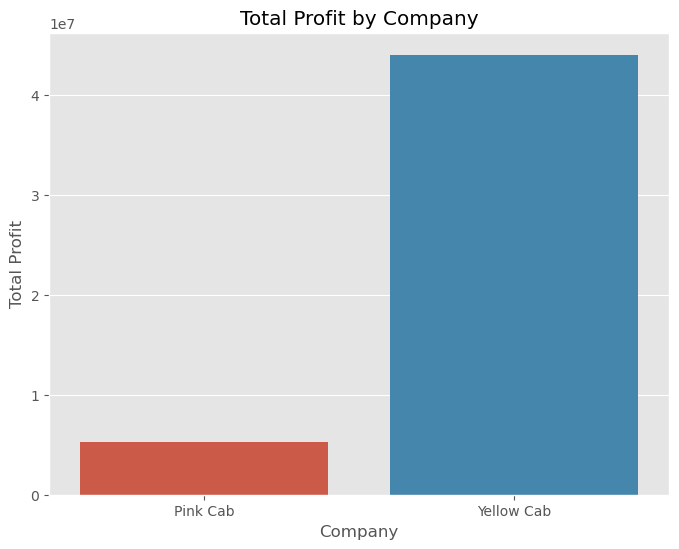

In [287]:
# Visualization of Total Profit for each Company
plt.figure(figsize = (8,6))
sns.barplot(x = Company_Performance.index, y = "Total_Profit", data = Company_Performance, hue ="Company" )
plt.xlabel("Company")
plt.ylabel("Total Profit")
plt.title("Total Profit by Company")
plt.savefig("Total_Profit.png")
plt.show()

#### **_Observation_**: Clearly Yellow Cab has made more profit than Pink Cab

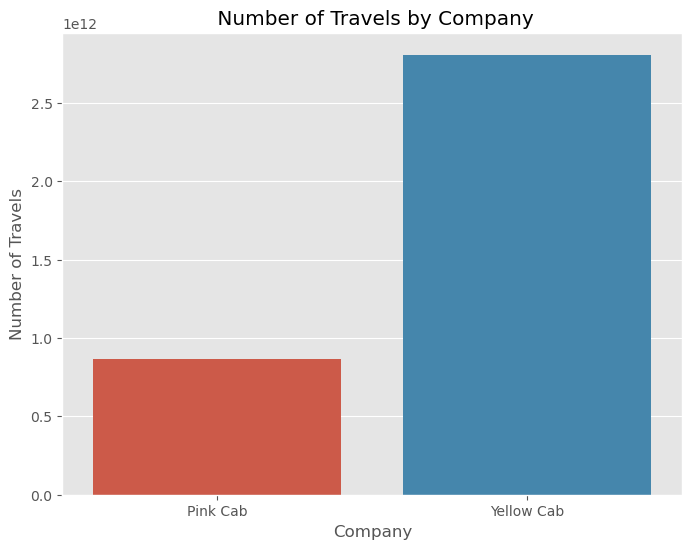

In [296]:
# Visualizations of the number of travels
plt.figure(figsize = (8,6))
sns.barplot(x = Company_Performance.index, y = "Number_of_Travels", data = Company_Performance, hue = "Company")
plt.xlabel("Company")
plt.ylabel("Number of Travels")
plt.title(" Number of Travels by Company")
plt.savefig("Number_of_rides.png")
plt.show()

#### **_Observation_**: Yellow Cab has _higher travelling_ rate than Pink Cab Company

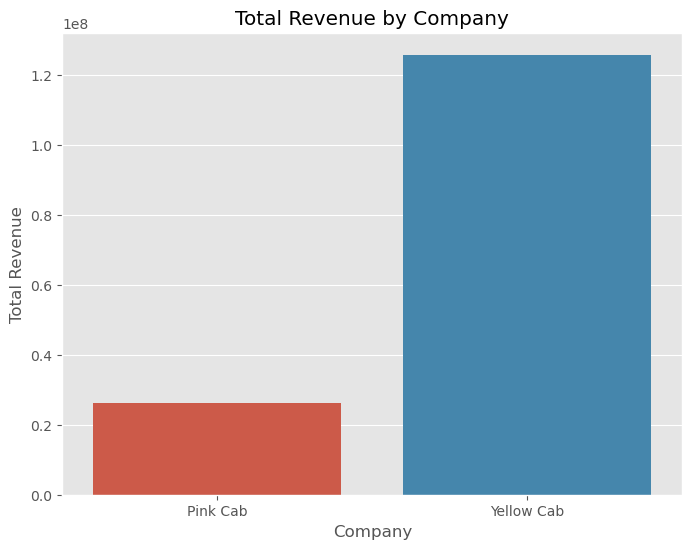

In [297]:
# Visualizations for the Total_Revenues
plt.figure(figsize =(8,6))
sns.barplot(x = Company_Performance.index, y = "Total_Revenue", data = Company_Performance, hue = "Company")
plt.xlabel("Company")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Company")
plt.savefig("Total_Revenue.png")
plt.show()

#### **_Observation_**: Yellow Cab also has a **higher revenue** generated than Pink Cab Company

#### **Deductions**: Yellow Cab has in summary _higher mobilized profits_, _higher number of travels_ and _higher revenue_ than Pink Cab Company. Hence, in effect, Yellow Cab performs better in this scenario of analysis

### Visualization of Customer Demographics

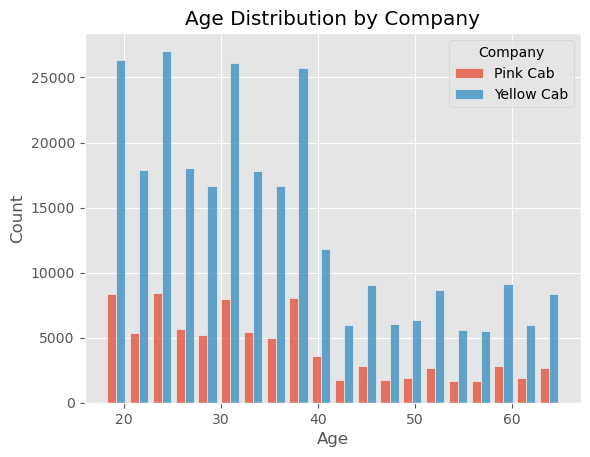

In [298]:
# We visualize the Age Distribution of the Company using (Histogram)
sns.histplot(data = merged_data, x = "Age", multiple ="dodge", shrink = 0.8, bins = 20, hue = "Company")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Company")
plt.savefig("Age_Distribution.png")
plt.show()

#### **Observation**: There are **higher counts** in all the considered age range or distributions for _Yellow Cab_ company than _Pink Cab_

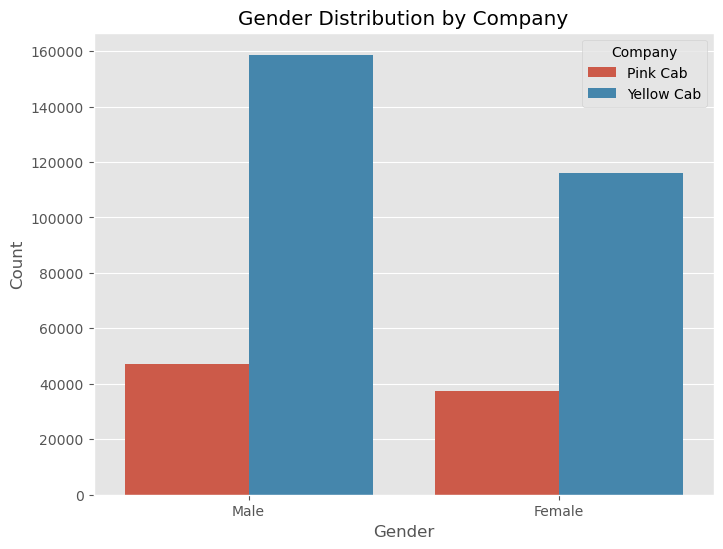

In [299]:
# Visualiztios of Gender distributions by company using the countplot
plt.figure(figsize =(8,6))
sns.countplot(data = merged_data, x = "Gender", hue = "Company")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution by Company")
plt.savefig("Gender_distribution.png")
plt.show()

#### **Observation**: 
#### There are  **higher counts** for each gender group considered for _Yello Cab_ than _Pink Cab_ .Additionally, the predominance in performance of Yellow Cab can be attributed to the higher number of male customers who use the service of Yellow Cab company for their travel plans

### Visualization of Transaction Patterns

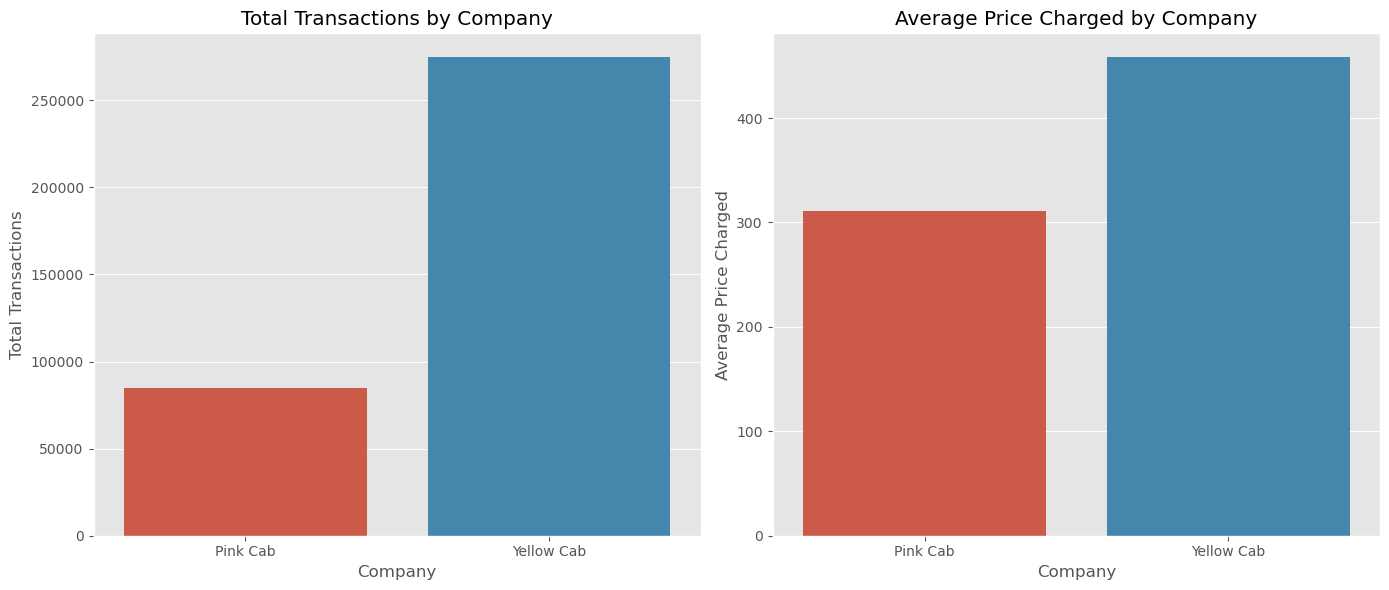

In [300]:
# We visualize the Total transactions and Average price by company using the bar plots
fig, axes = plt.subplots(1,2, figsize = (14,6))
Company_Transaction = merged_data.groupby('Company').agg(Total_Transactions = ("Transaction ID", 'count'),
                                           Average_Price = ("Price Charged", 'mean'))
sns.barplot(x = Company_Transaction.index, y = "Total_Transactions", data = Company_Transaction, ax = axes[0], hue = "Company")
axes[0].set_xlabel("Company")
axes[0].set_ylabel("Total Transactions")
axes[0].set_title("Total Transactions by Company")

sns.barplot(x = Company_Transaction.index, y = "Average_Price", data  = Company_Transaction, ax = axes[1], hue = "Company")
axes[1].set_xlabel("Company")
axes[1].set_ylabel("Average Price Charged")
axes[1].set_title("Average Price Charged by Company")
plt.tight_layout()
plt.savefig("Subplot_of_Total_Transaction_Average_Price.png")
plt.show()

#### **Observations**: _Yellow Cab_ has in both cases of **Total Transaction and Average Price charged**  higher values compared to _Pink Cab_

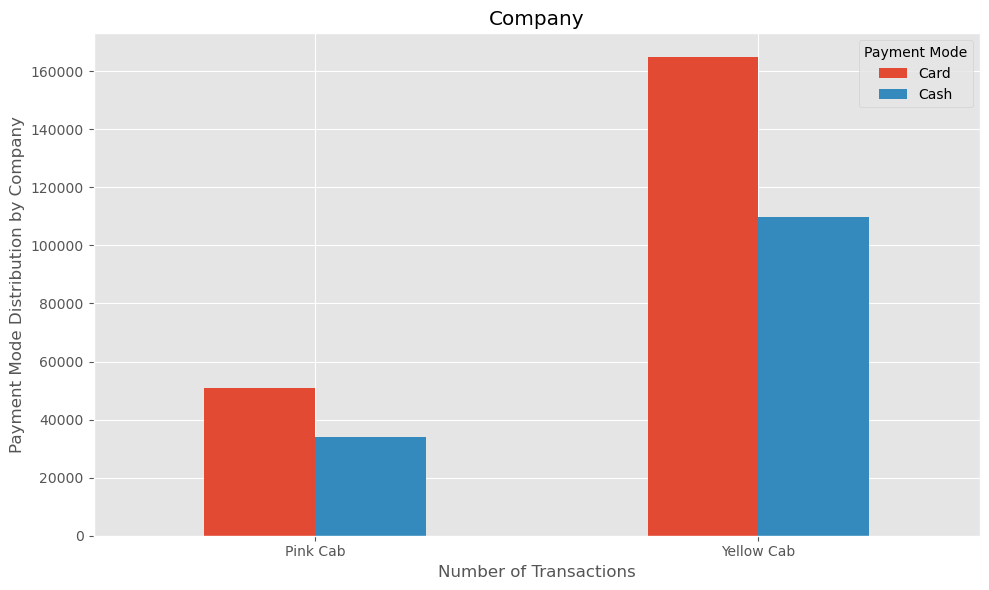

In [301]:
# We visualize the payment mode distribution by company using the grouped bar plot 
payment_mode_counts = merged_data.groupby(["Company", "Payment_Mode"]).size().unstack().fillna(0)
payment_mode_counts.plot(kind = "bar", stacked = False, figsize = (10,6))
plt.title("Company")
plt.xlabel("Number of Transactions")
plt.ylabel("Payment Mode Distribution by Company")
plt.xticks(rotation =0)
plt.legend(title ="Payment Mode")
plt.tight_layout()
plt.savefig("Payment_Mode.png")
plt.show()

#### **Observation**: In terms of the **payment mode** - Yellow Cab has very higher number of **_transactions_** in both cases of _Card and Cash_ compared to Pink Cab but however has frequent use of _Card_ more as the mode of payment mode than _Cash_

### Visualization by City-wise Data

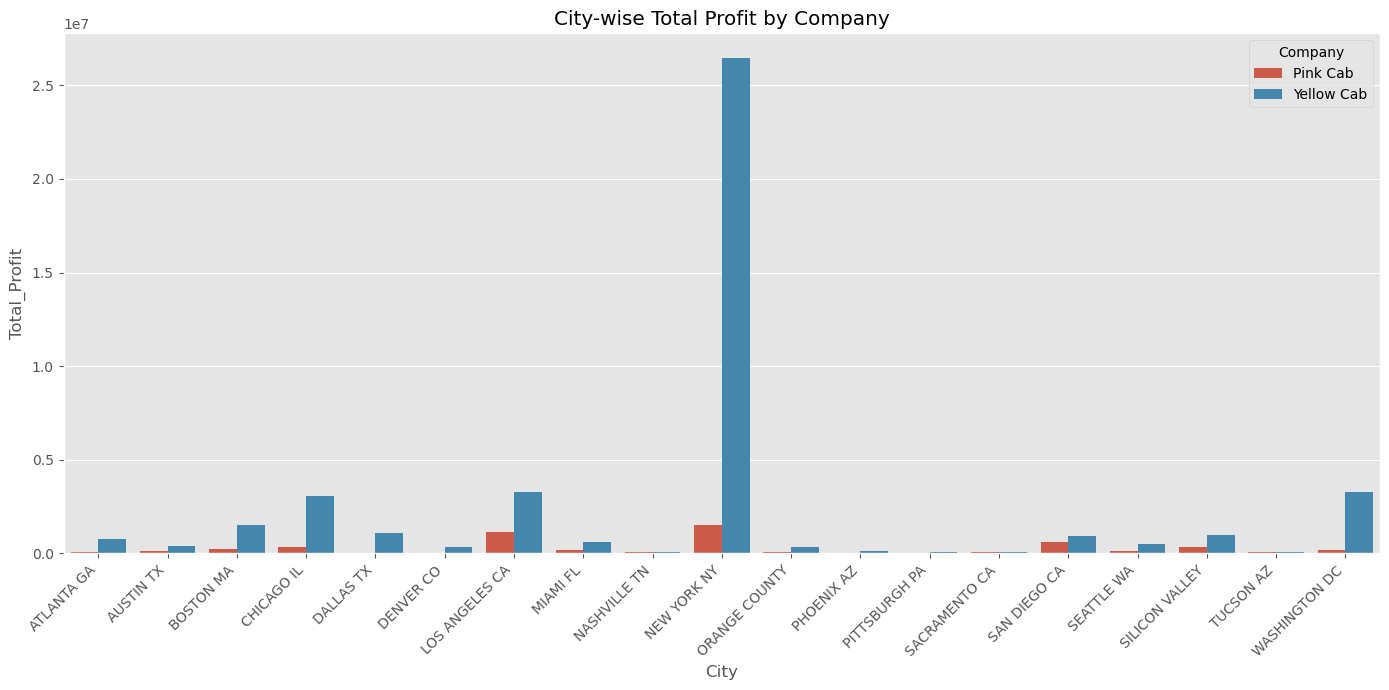

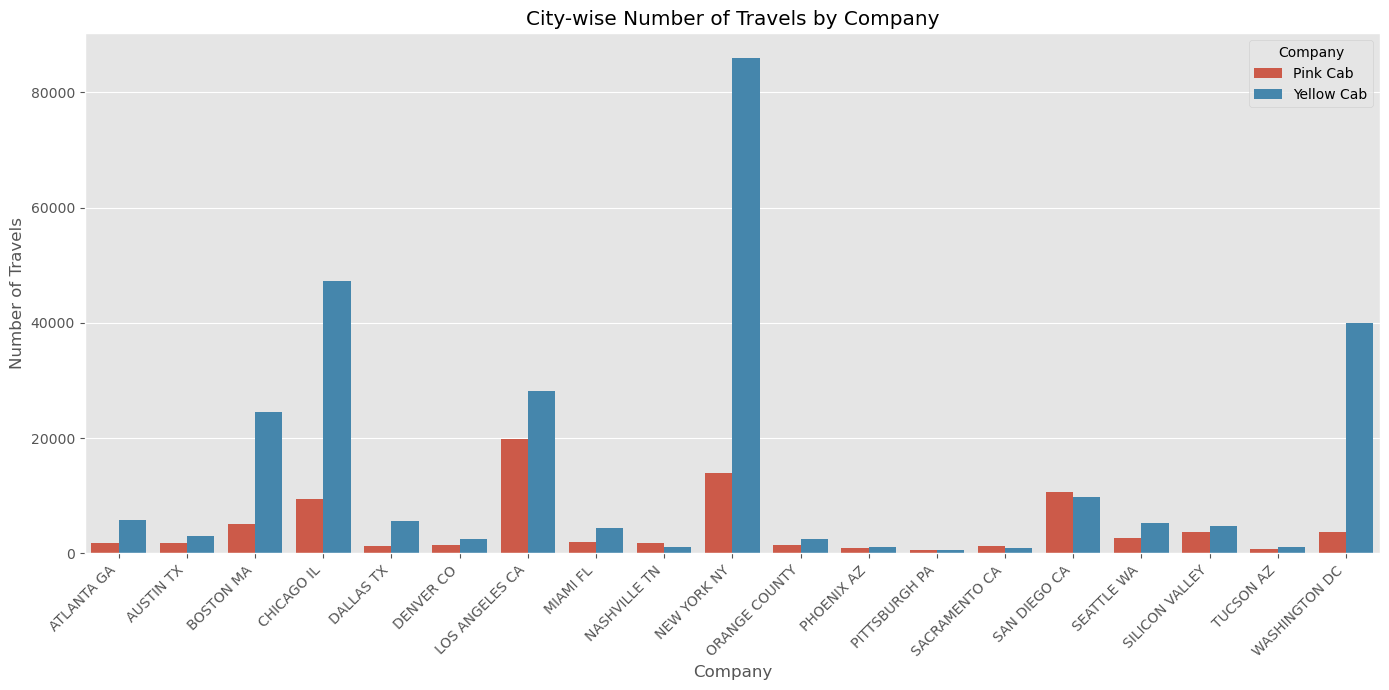

In [294]:
### We visualize City-wise Total profit by Company
plt.figure(figsize = (14,7))
sns.barplot(x = "City", y ="Total_Profit", data = City_Performance, hue = "Company")
plt.xlabel("City")
plt.ylabel("Total_Profit")
plt.title("City-wise Total Profit by Company")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()

# We visualize City-wise by Number of travels by Company
plt.figure(figsize =(14,7))
sns.barplot(x = "City", y = "Number_of_Travels", data = City_Performance, hue = "Company")
plt.xlabel("Company")
plt.ylabel("Number of Travels")
plt.title("City-wise Number of Travels by Company")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()

#### **Observation**: In terms of _City-wise Profit by Company_, Yellow Cab has **higher profits** in each city compared to Pink Cab and also has the **highest profit** for New York, NY in itself

#### **Observation**: In terms of _City-wise Number of Trevels_, Yellow Cab also has a **higher number of travels per city** compared to  Pink Cab, with the NEW YORK NY city recording the highest number of travels for Yellow Cab Company

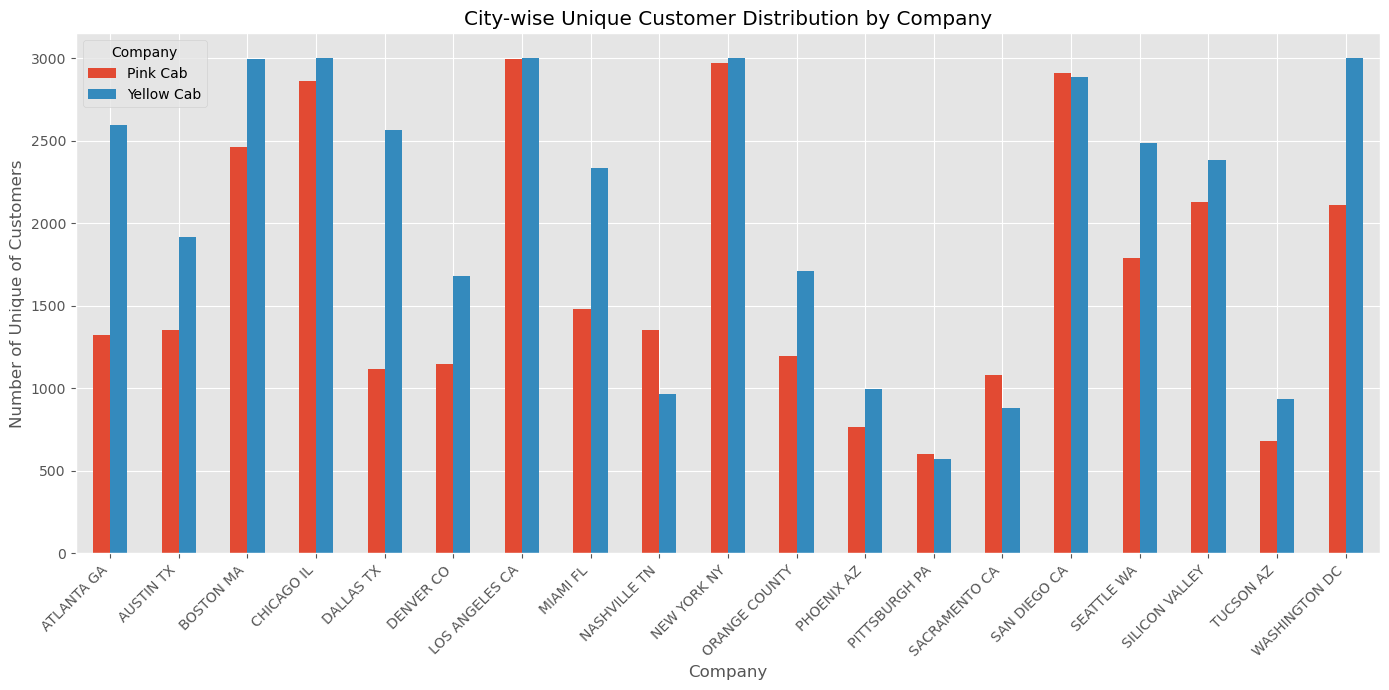

In [295]:
# Visualize City-wise User Distribution by Company:
City_User_Performance.plot(kind = "bar", stacked = False, figsize =(14,7))
plt.xlabel("Company")
plt.ylabel("Number of Unique of Customers")
plt.title("City-wise Unique Customer Distribution by Company")
plt.xticks(rotation = 45, ha = "right")
plt.legend(title = "Company")
plt.tight_layout()
plt.show()

#### **Observation**: The number of _unique customers by company per city_ in general is **very high** for company Yellow Cab than Pink Cab company. The exceptions occur in cities of: _NASHVILLE TN, PITTSBURGH PA AND LOS ANGELES CA_ being almost equal for both companies

#### **Deductions**: Majority of the cities for Yellow Cab records the **highest number** of customer patronization in their service, implying that Yellow Cab is the best Company for **partnership and collaboration**

### **Conclusion**: I recommend Yellow Cab as the best company for XYZ company to invest in based on the above analysis made on the dataset